In [1]:
%matplotlib inline
from pylab import *
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from treatment_sims_2023_02_21 import *

Splikes version  0.1.2
Plasticnet version  0.1.9
macOS-10.16-x86_64-i386-64bit


In [3]:
from plotutils import *

In [4]:
base='sims/2023-04-06'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)
    


mkdir sims/2023-04-06


In [ ]:
def addseq(seq):
    base_image_file='asdf/bbsk081604_all.asdf'

    images=[]
    dt=200*ms

    for bv in blur:
        if bv<=0:
            im=pi5.filtered_images(
                                base_image_file,
                                {'type':'dog','sd1':1,'sd2':3},
                                {'type':'norm'},
                                )
        else:
            im=pi5.filtered_images(
                                    base_image_file,
                                    {'type':'blur','size':bv},
                                    {'type':'dog','sd1':1,'sd2':3},
                                    {'type':'norm'},
                                    )
        images.append(im)


    dt=200*ms        
    pre1=pn.neurons.natural_images_with_jitter(images[0],
                                                rf_size=rf_size,
                                                time_between_patterns=dt,
                                                sigma_r=1,
                                                sigma_c=1,
                                                verbose=False)

    pre2=pn.neurons.natural_images_with_jitter(images[1],
                                                rf_size=rf_size,
                                                other_channel=pre1,
                                                time_between_patterns=dt,
                                                mu_r=mu_r,mu_c=mu_c,
                                                sigma_r=sigma_r,sigma_c=sigma_c,
                                                verbose=False)



    sigma=noise
    pre1+=pn.neurons.process.add_noise_normal(0,sigma)

    sigma=noise
    pre2+=pn.neurons.process.add_noise_normal(0,sigma)

    pre=pre1+pre2

    post=default_post(number_of_neurons)
    c=default_bcm(pre,post,orthogonalization=ortho)
    c.eta=eta

    sim=pn.simulation(total_time)
    sim.dt=dt

    sim.monitor(post,['output'],save_interval)
    sim.monitor(c,['weights','theta'],save_interval)
    sim+=pn.grating_response(print_time=False)


    seq+=sim,[pre,post],[c]    

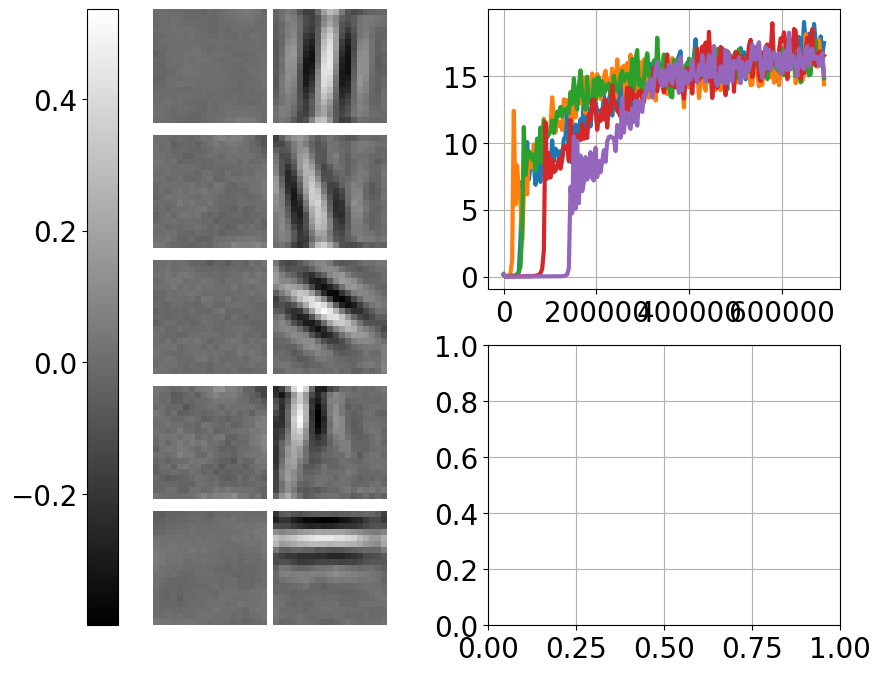

.] Sequence Time Elapsed...2 m, 42.77 s


In [14]:
rf_size=19
eta=2e-6
blur_left=6
blur_right=-1

number_of_neurons=5
number_of_processes=4
mu_c=7.5
sigma_c=2
mu_r=0
sigma_r=0
noise=0.1

seq=pn.Sequence()

total_time=8*day
save_interval=1*hour



addseq(seq)


# blur_left=-1
# blur_right=6

# addseq(seq)
seq.run(display=mydisplay,display_hash=False,
               time_between_display=save_interval)
sfname=f"{base}/deficit.asdf"
pn.save(sfname,seq) 

## optical fix

In [15]:
for noise in [0.1,0.5,1]:
    seq2=pn.Sequence()

    total_time=3*day
    save_interval=1*hour

    seq2.load_seq(seq)

    blur_left=-1
    blur_right=-1

    addseq(seq2)


    seq2.run(display_hash=False,
                   time_between_display=save_interval)
    sfname=f"{base}/fix noise {noise:.1f}.asdf"
    pn.save(sfname,seq2) 

Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[..] Sequence Time Elapsed...42.98 s
Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[..] Sequence Time Elapsed...41.80 s
Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.Using cache_images/cache_images_c2e0829f3e61ca9a4b271b0f7c2ee1f1.asdf from cache.[..] Sequence Time Elapsed...42.16 s


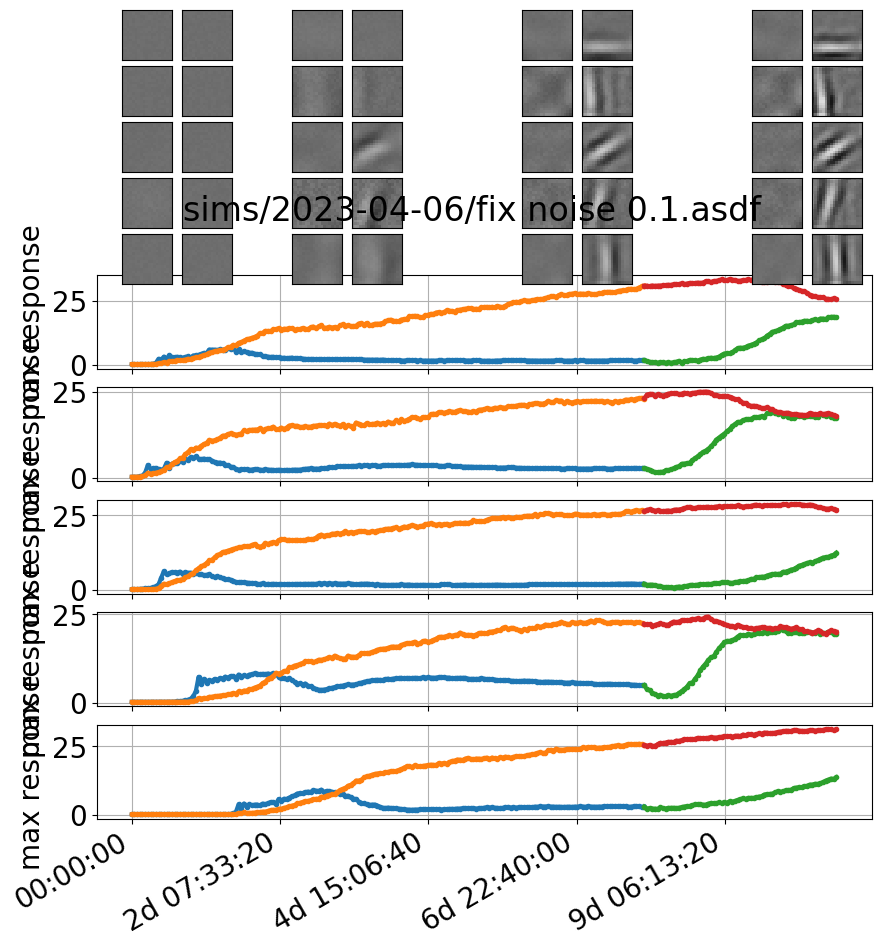

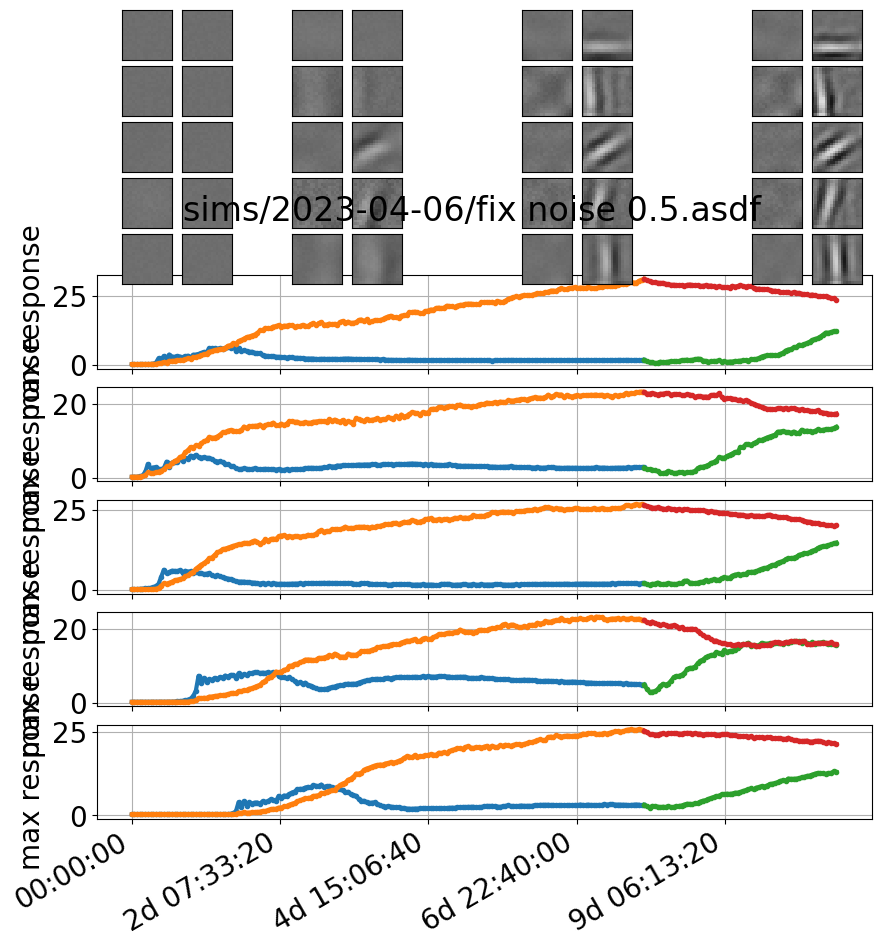

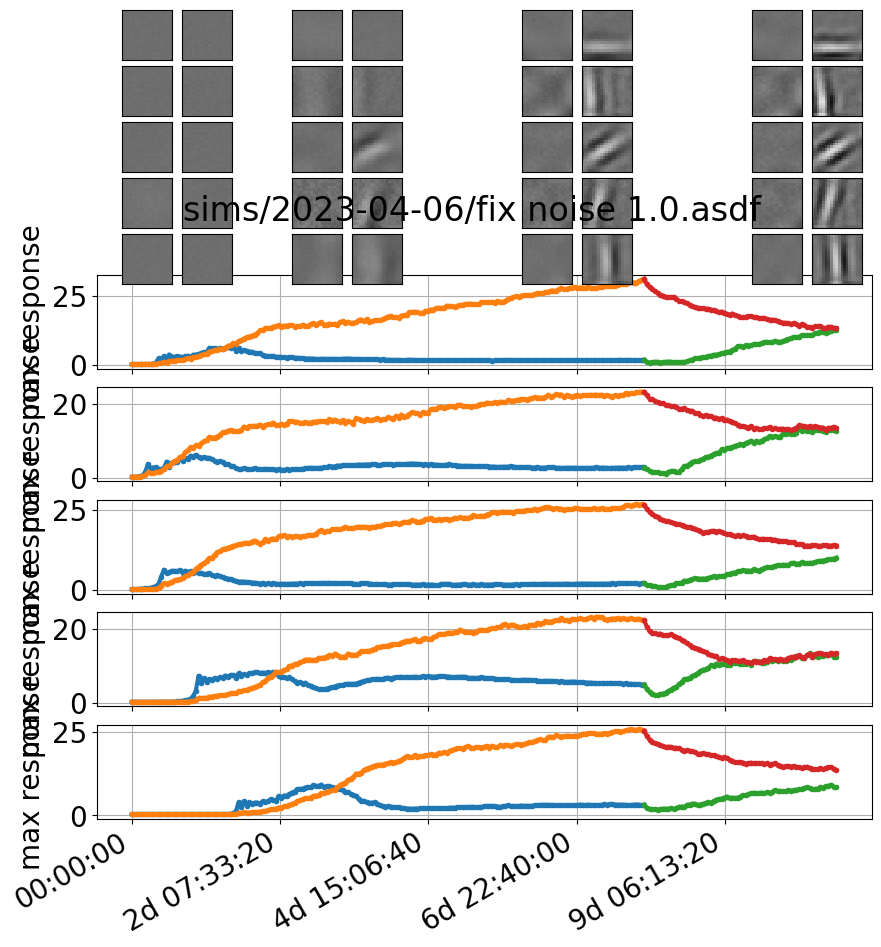

In [19]:
RR={}
for noise in [0.1,0.5,1]:
    sfname=f"{base}/fix noise {noise:.1f}.asdf"
    figure()
    plot_max_response(sfname)
    plot_mini_rfs(sfname,
                  total_time/10,.15,.85,
                  2*total_time/3,.32,.85,
                  2*2*total_time/3,.55,.85,
                  2*3*total_time/3,.78,.85,
                 )
    
    suptitle(sfname)
    RR[sfname]=R=Results(sfname)

In [20]:
weak_i=0
strong_i=1

sims/2023-04-06/fix noise 1.0.asdf


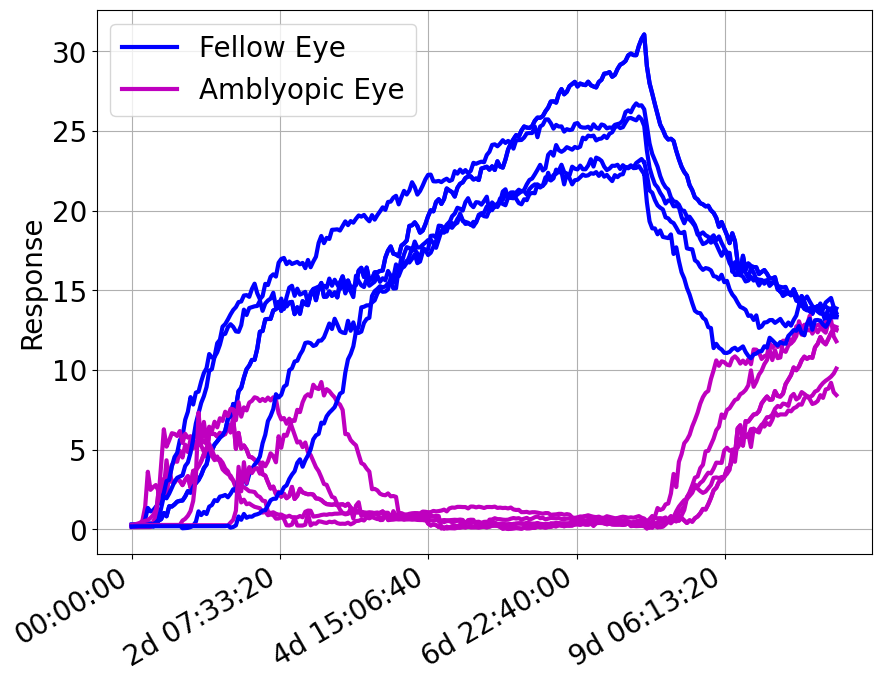

In [22]:
plot(R.t,R.y[:,0,strong_i],'b',label='Fellow Eye')
plot(R.t,R.y[:,0,weak_i],'m',label='Amblyopic Eye')

for n in range(5):
    plot(R.t,R.y[:,n,0],'m')
    plot(R.t,R.y[:,n,1],'b')
    
    
ylabel('Response')
legend()
print(sfname)
reformat_time_axis()    

Text(0.5, 0, 'Open-Eye Noise Level')

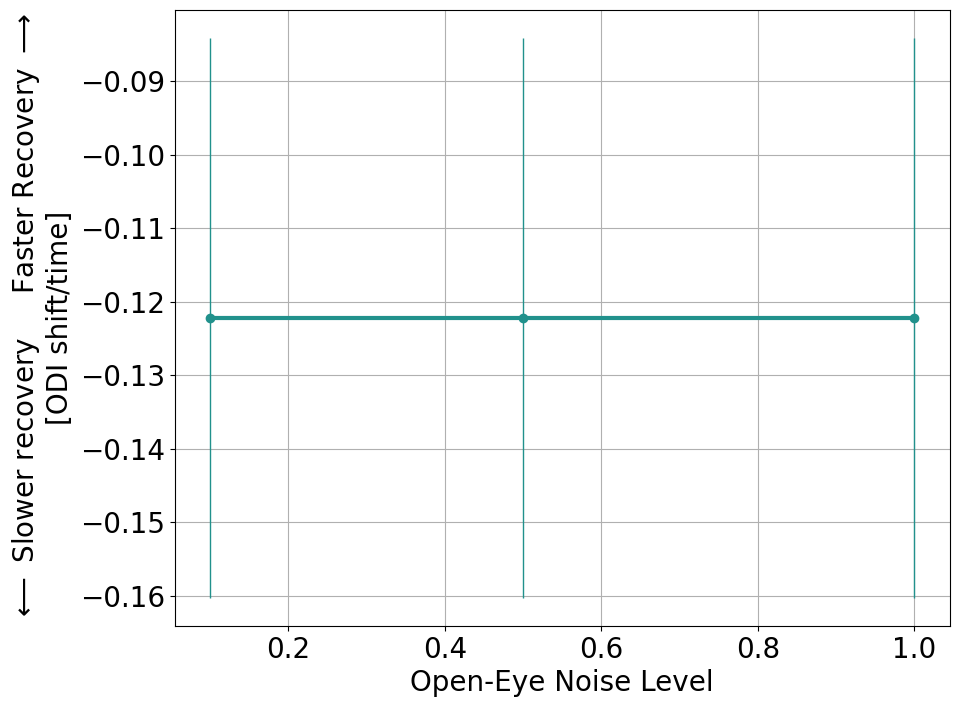

In [24]:
import cycler
colormap=cm.viridis

n = 5

colormap=cm.viridis
color = colormap(np.linspace(0, 1,n))


count=0
s=Storage()
for noise in [0.1,0.5,1]:
    sfname=f"{base}/fix noise {noise:.1f}.asdf"
    count+=1

    R=RR[sfname]

    noise=noise
    
    idx1,idx2=R.sequence_index[0]
    t=R.t/day
    recovery_rate_μ,recovery_rate_σ=μσ((R.ODI[idx2,:]-R.ODI[idx1,:])/(t[idx2]-t[idx1]))  

    s+=noise,recovery_rate_μ,recovery_rate_σ
    
    
noise,recovery_rate_μ,recovery_rate_σ=s.arrays()    

errorbar(noise,-recovery_rate_μ,yerr=2*recovery_rate_σ,marker='o',elinewidth=1,color=color[2],
        label=f'mu_c={mu_c}, sigma_c={sigma_c}')    


ylabel(r'$\longleftarrow$ Slower recovery     Faster Recovery $\longrightarrow$'+"\n[ODI shift/time]")
xlabel('Open-Eye Noise Level')
